In this notebook we measure the eccentricity and generate the diagnostic plots for all the waveforms in `home/md.shaikh/ecc_waveforms` on CIT.

**If you are not familiar with how to use the measureEccentricity module, check measure_eccentricity_demo notebook first**

In [36]:
import glob
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../")
from measureEccentricity.load_data import load_waveform
from measureEccentricity.measureEccentricity import measure_eccentricity

In [6]:
# change home1 to home if you are running on CIT
waveform_dir = "/home1/md.shaikh/ecc_waveforms"

### Measure eccentricity of EOB waveforms

There are two sets of EOB waveforms. One generated specially for eccentricity test and another for general use. The first ones start with `EccTest` and second ones with `Case`

The waveforms in `EccTest` could be divided in 4 subsets on the basis of the parameters used to generate these
- set 1: $q = 1, \chi_{1z} = \chi_{2z} = 0$
- set 2: $q = 2, \chi_{1z} = \chi_{2z} = 0.5$
- set 3: $q = 4, \chi_{1z} -0.6, \chi_{2z} = -0.6$
- set 4: $q = 6, \chi_{1z} = 0.4, \chi_{2z} = -0.4$

In [17]:
EccTestSet1 = sorted(glob.glob(f"{waveform_dir}/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00*.h5"))

In [19]:
len(EccTestSet1)

101

In [237]:
def create_diagnostic_plots(tref_in, dataDict, method, extra_kwargs, axarr):
    tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(
        tref_in, 
        dataDict, 
        method=method, 
        return_ecc_method=True,
        extra_kwargs=extra_kwargs)
    plt.subplots_adjust(hspace=0.35)

    axarr[0].plot(tref_out, ecc_vec, label=method)
    axarr[0].set_xlabel("t", fontsize=12)
    axarr[0].set_ylabel("eccentricity", fontsize=12)
    axarr[0].grid()
    axarr[0].legend()

    axarr[1].plot(eccMethod.t_for_ecc_test, eccMethod.decc_dt, label=method)
    axarr[1].set_xlabel("t", fontsize=12)
    axarr[1].set_ylabel("decc/dt", fontsize=12)
    axarr[1].grid()
    axarr[1].legend()

    axarr[2].plot(tref_out, mean_ano_vec, label=method)
    axarr[2].set_xlabel("t", fontsize=12)
    axarr[2].set_ylabel("mean anomaly", fontsize=12)
    axarr[2].grid()
    axarr[2].legend()

    axarr[3].plot(tref_out, eccMethod.omega_peak_at_tref_out, label=f'Periastrons {method}')
    axarr[3].plot(tref_out, eccMethod.omega_trough_at_tref_out, label=f'Apastrons {method}')
    axarr[3].plot(eccMethod.t, eccMethod.omega22)
    axarr[3].plot(eccMethod.t[eccMethod.peaks_location], eccMethod.omega22[eccMethod.peaks_location], marker="o", ls="")
    axarr[3].plot(eccMethod.t[eccMethod.troughs_location], eccMethod.omega22[eccMethod.troughs_location], marker="o", ls="")
    # axarr[3].set_ylim(0.0155, 0.016)
    # axarr[3].set_xlim(-35000,-30000)
    axarr[3].set_xlim(tref_out[0], tref_out[-1])
    axarr[3].set_xlabel("t", fontsize=12)
    axarr[3].set_ylabel("$\omega_{22}$", fontsize=12)
    axarr[3].grid()
    axarr[3].legend(fontsize=12)

    axarr[4].plot(tref_out, eccMethod.omega_peak_at_tref_out, label=f'Periastrons {method}')
    axarr[4].plot(tref_out, eccMethod.omega_trough_at_tref_out, label=f'Apastrons {method}')
    axarr[4].plot(eccMethod.t, eccMethod.omega22)
    axarr[4].plot(eccMethod.t[eccMethod.peaks_location], eccMethod.omega22[eccMethod.peaks_location], marker="o", ls="")
    axarr[4].plot(eccMethod.t[eccMethod.troughs_location], eccMethod.omega22[eccMethod.troughs_location], marker="o", ls="")
    t_min = - 1000
    t_max = tref_out[-1]
    omega_min = eccMethod.omega22[np.argmin(np.abs(eccMethod.t - (t_min)))]
    omega_max = eccMethod.omega22[np.argmin(np.abs(eccMethod.t - (t_max)))]
    axarr[4].set_ylim(omega_min, omega_max)
    axarr[4].set_xlim(t_min, t_max)
    # axarr[4].set_xlim(tref_out[0], tref_out[-1])
    axarr[4].set_xlabel("t", fontsize=12)
    axarr[4].set_ylabel("$\omega_{22}$", fontsize=12)
    axarr[4].grid()
    axarr[4].legend(fontsize=12)
    
    tpeaks = eccMethod.t[eccMethod.peaks_location[1:]]
    axarr[5].plot(tpeaks[1:], eccMethod.orb_phase_diff_ratio_at_peaks[1:], marker="o", label=f"peaks phase diff ratio {method}")
    ttroughs = eccMethod.t[eccMethod.troughs_location[1:]]
    axarr[5].plot(ttroughs[1:], eccMethod.orb_phase_diff_ratio_at_troughs[1:], marker="o", label=f"troughs phase diff ratio {method}")
    axarr[5].set_xlabel("t", fontsize=12)
    axarr[5].set_ylabel("$\Delta \Phi_{orb}[i] / \Delta \Phi_{orb}[i-1]$")
    axarr[5].grid()
    axarr[5].legend()
    axarr[5].set_xlim(tref_out[0], tref_out[-1])

In [238]:
def compare_diagnostic_plots_for_methods(tref_in, dataDict, methods, extra_kwargs):
    fig, axarr = plt.subplots(nrows=6, figsize=(12, 16))
    for method in methods:
        create_diagnostic_plots(tref_in, dataDict, method, extra_kwargs, axarr)
    return fig, axarr

In [239]:
tref_in = np.arange(-50000, 0)

In [245]:
methods = ["ResidualAmplitude"]
extra_kwargs = {"num_orbits_to_exclude_before_merger": 1}

In [246]:
import re

In [247]:
params_regex = re.compile(r"q(-?\d.\d+)_chi1z(-?\d.\d+)_chi2z(-?\d.\d+)_EOBecc(\d.\d+)")

/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:335: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:335: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:335: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:335: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:335: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:335: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/hom

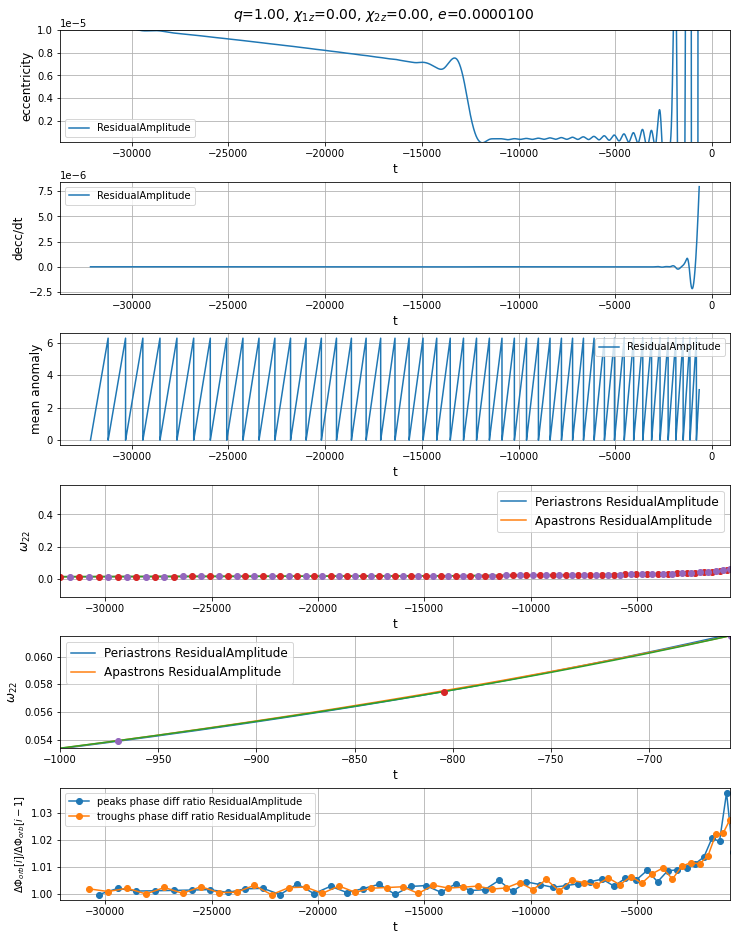

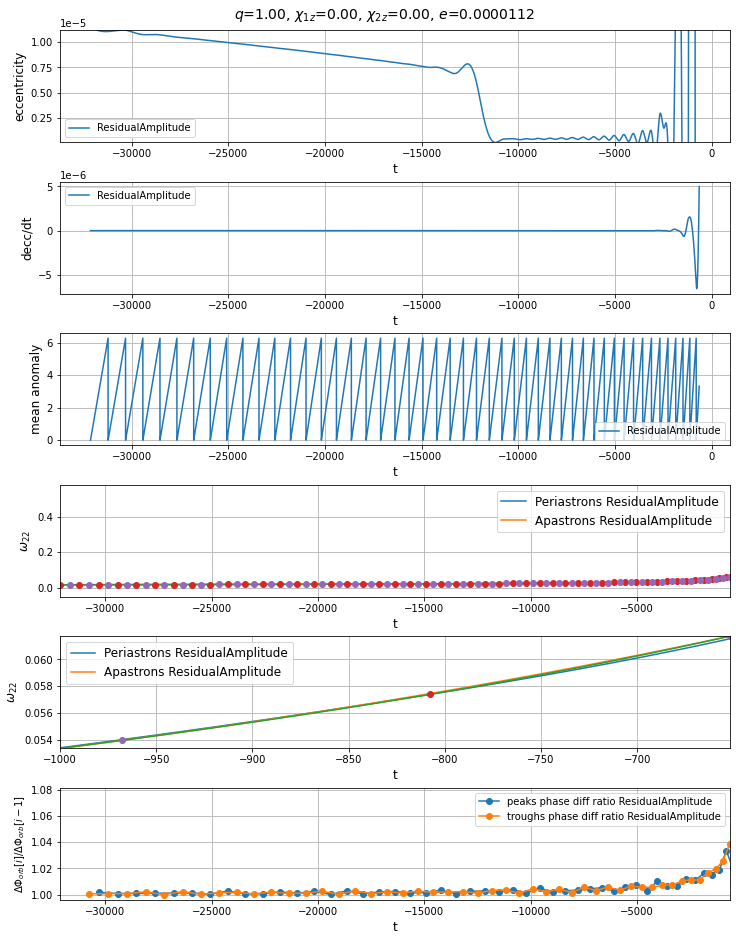

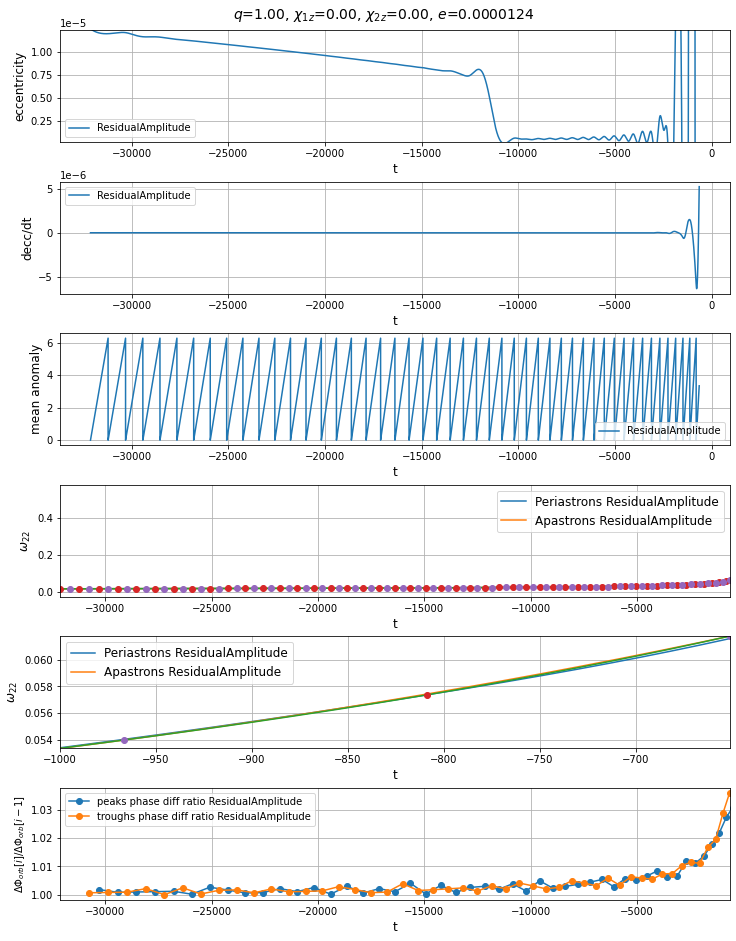

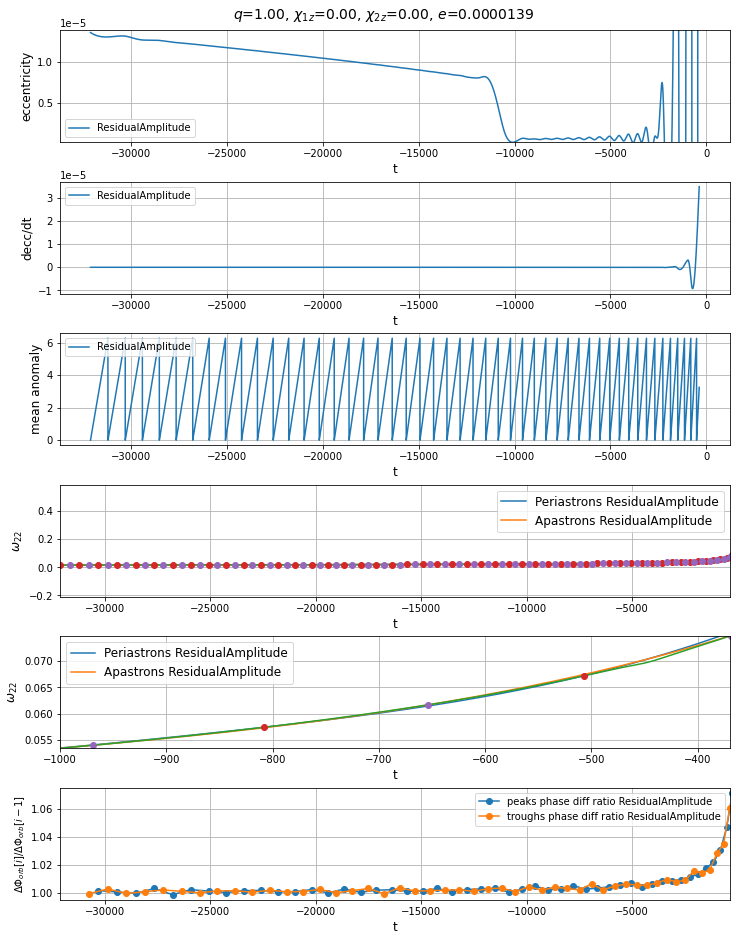

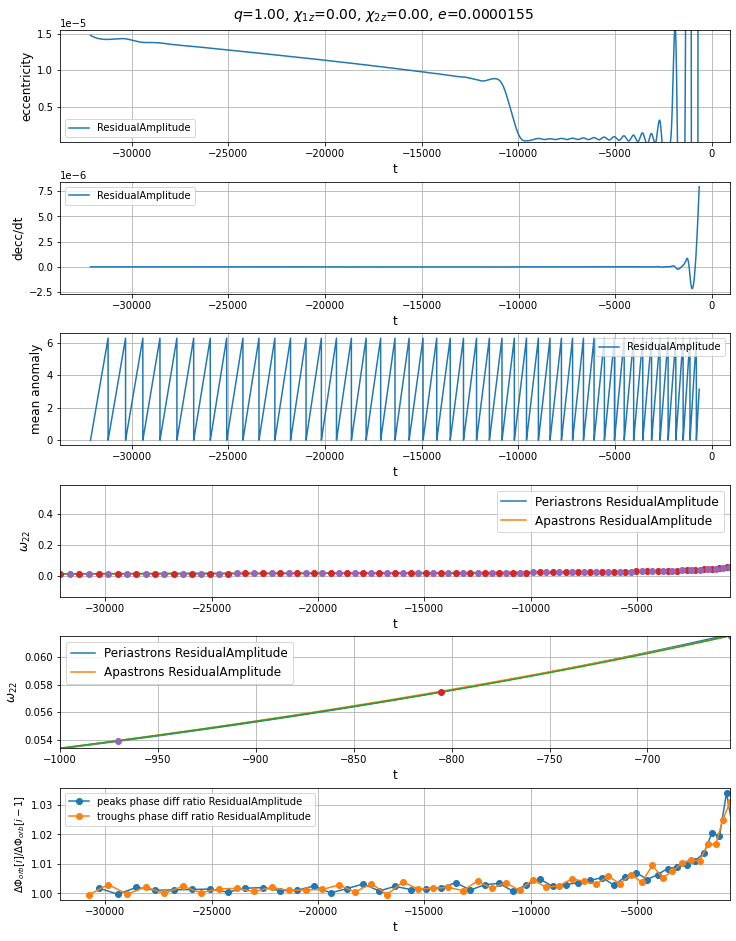

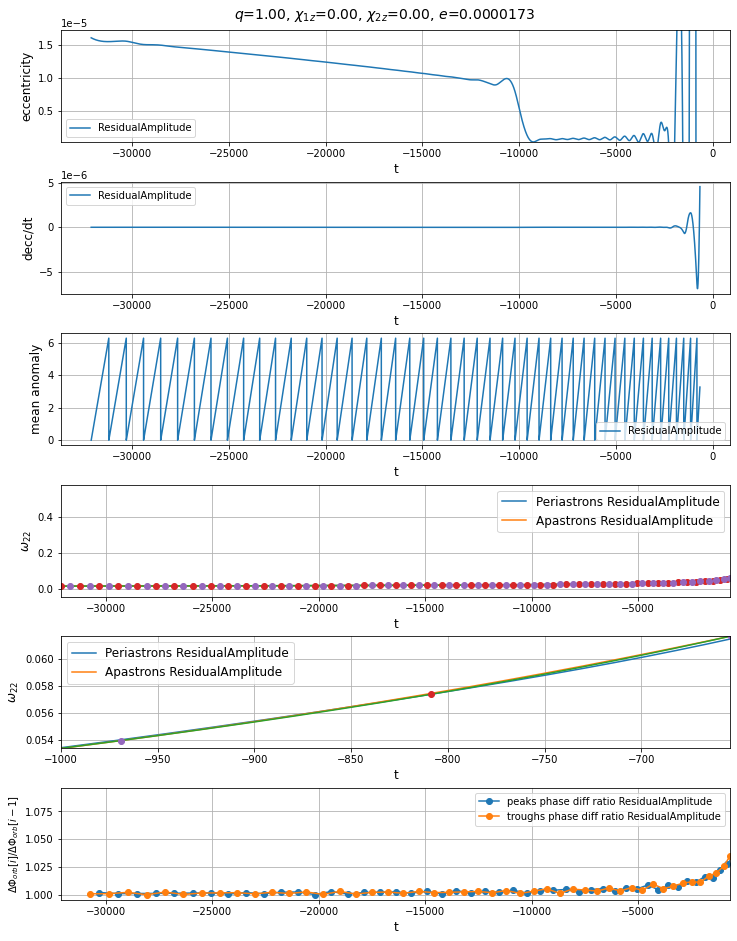

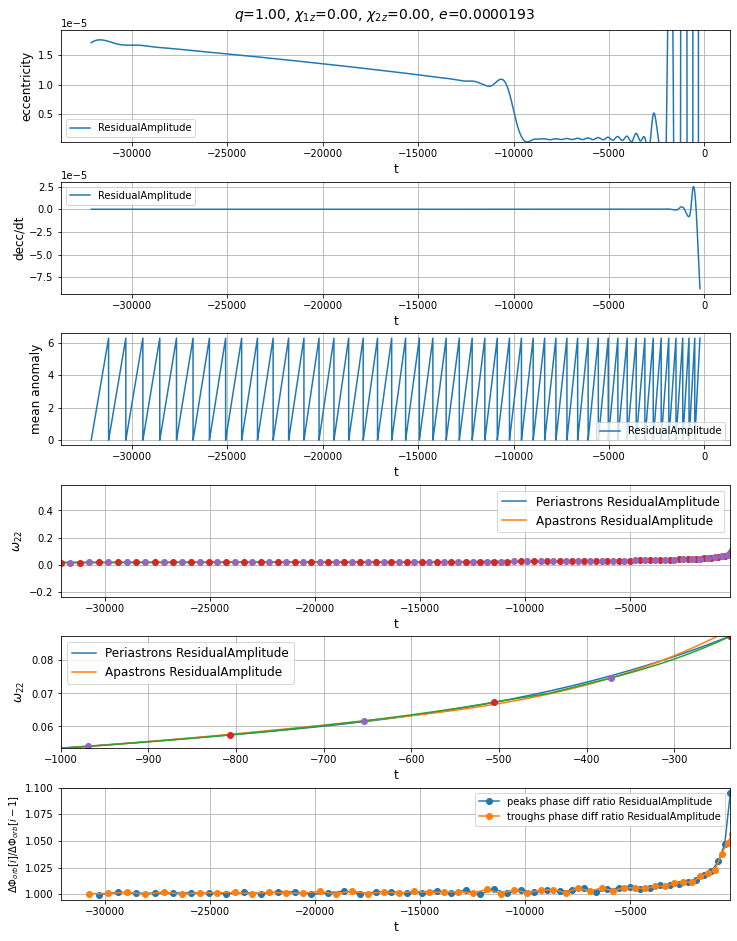

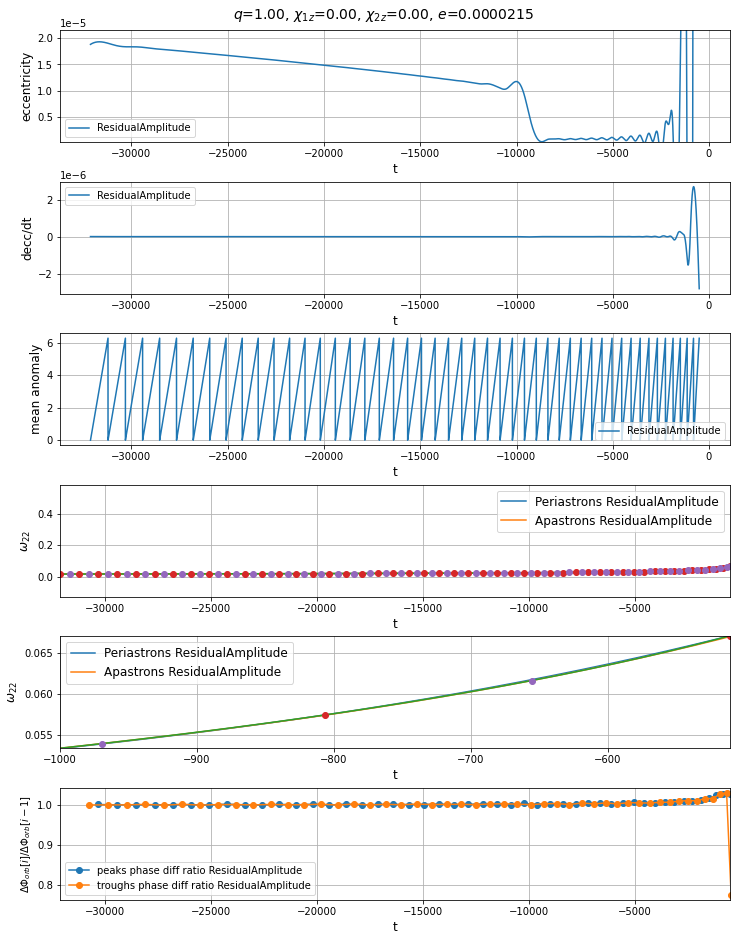

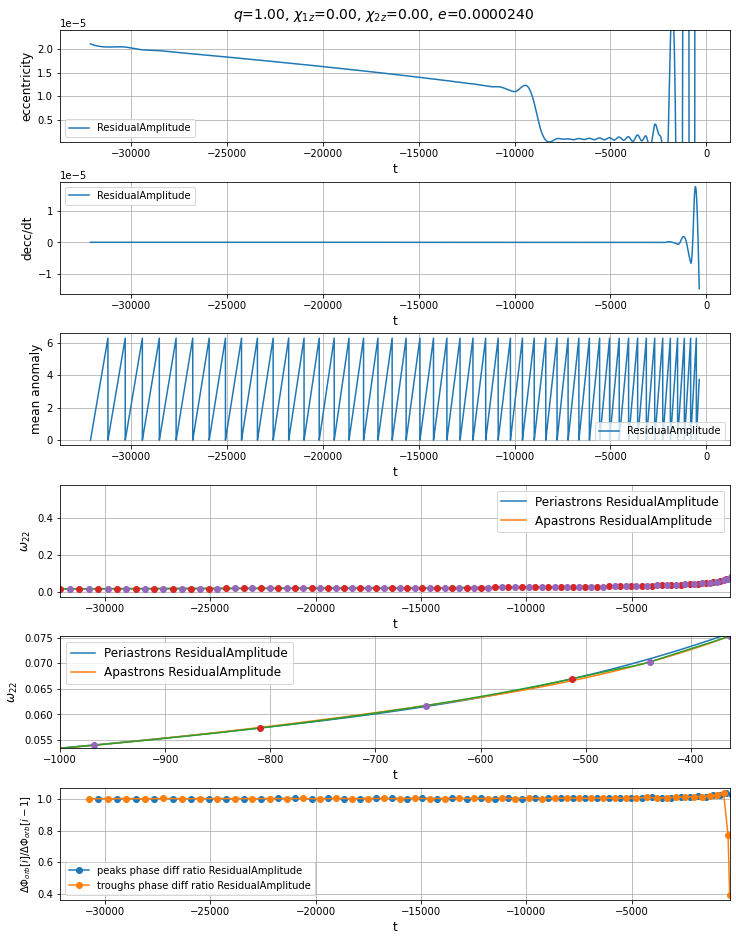

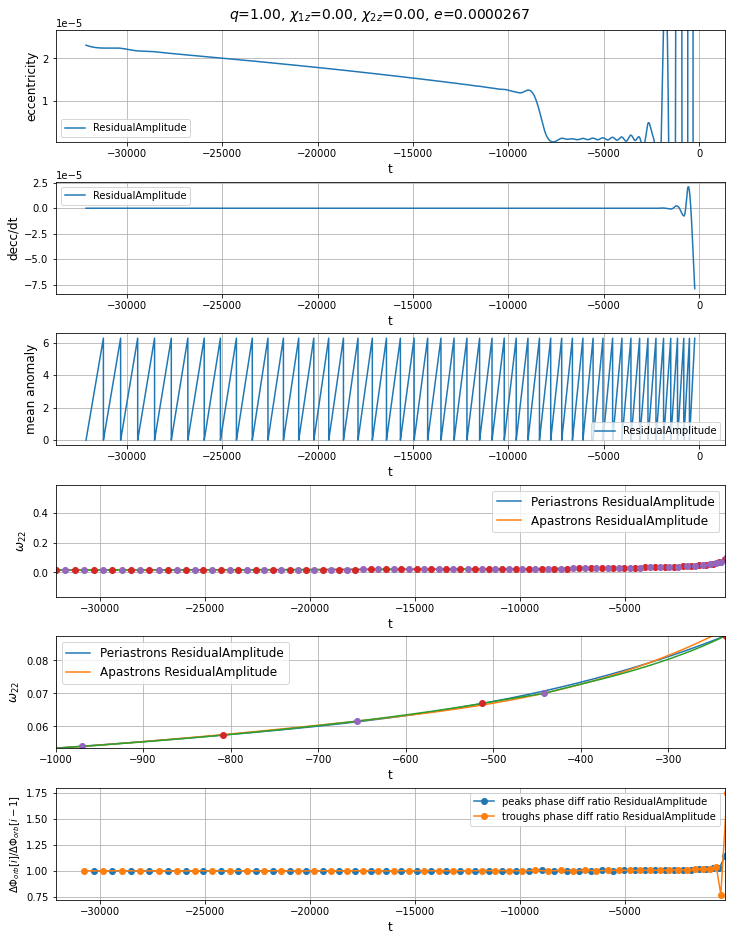

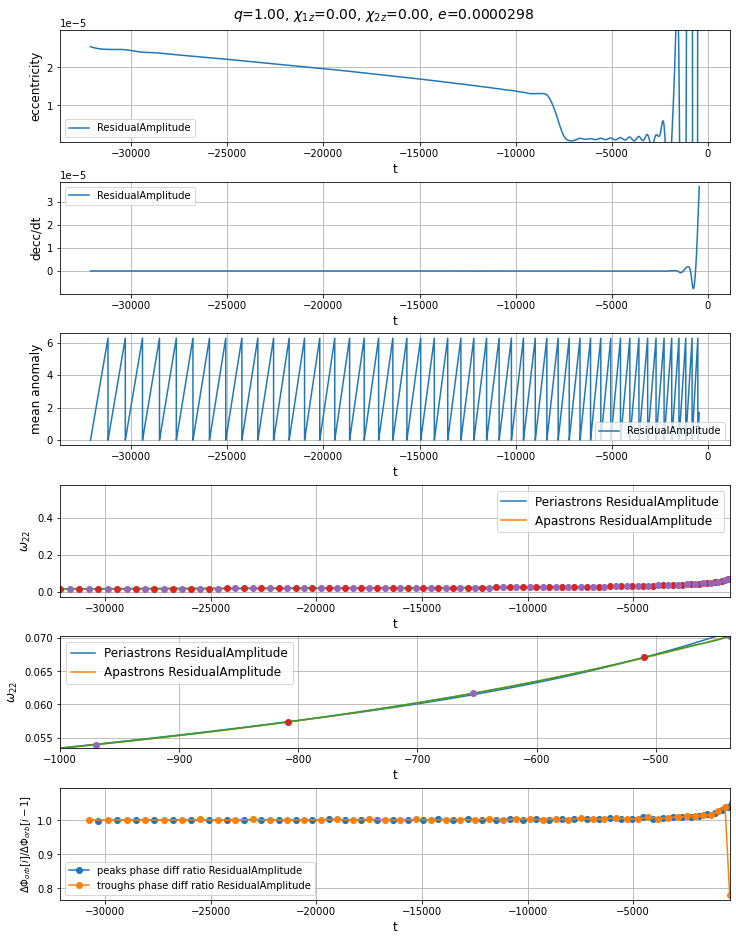

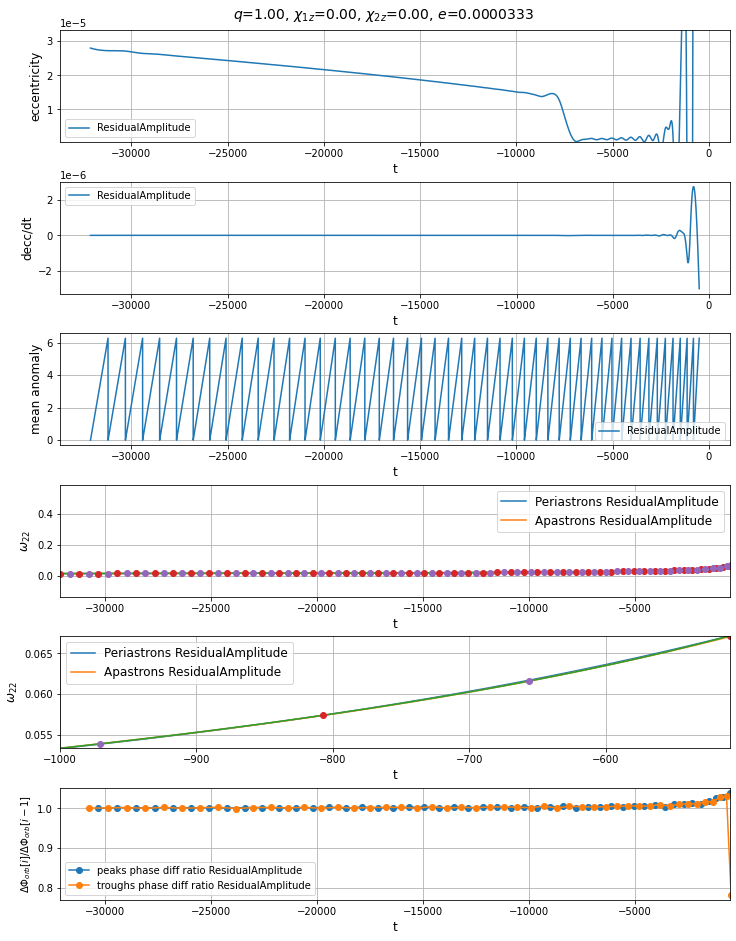

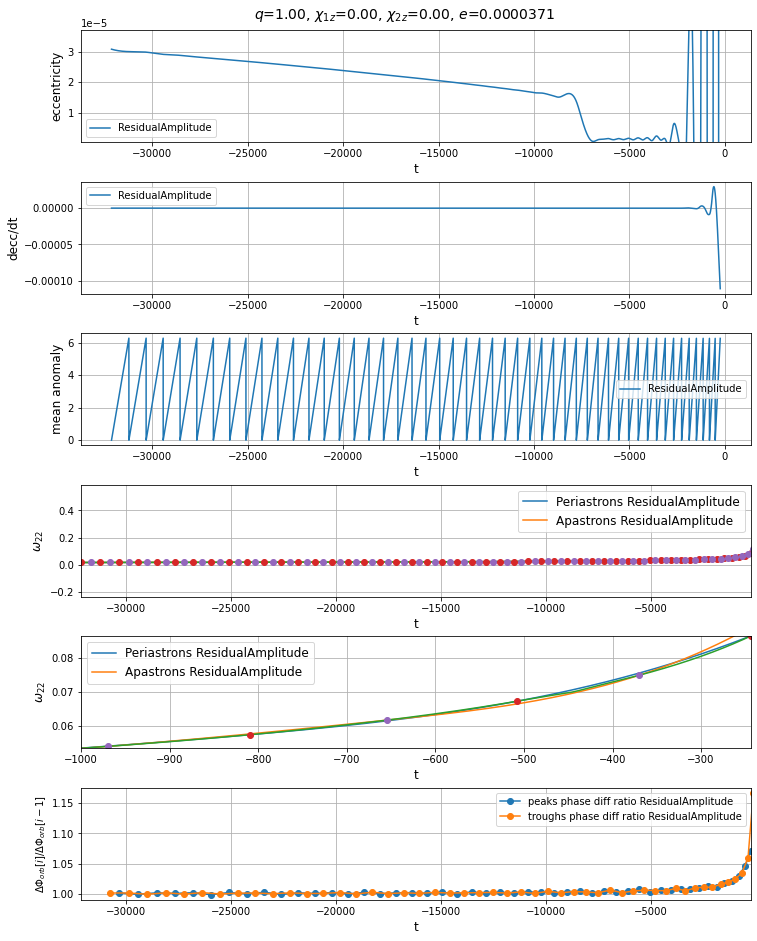

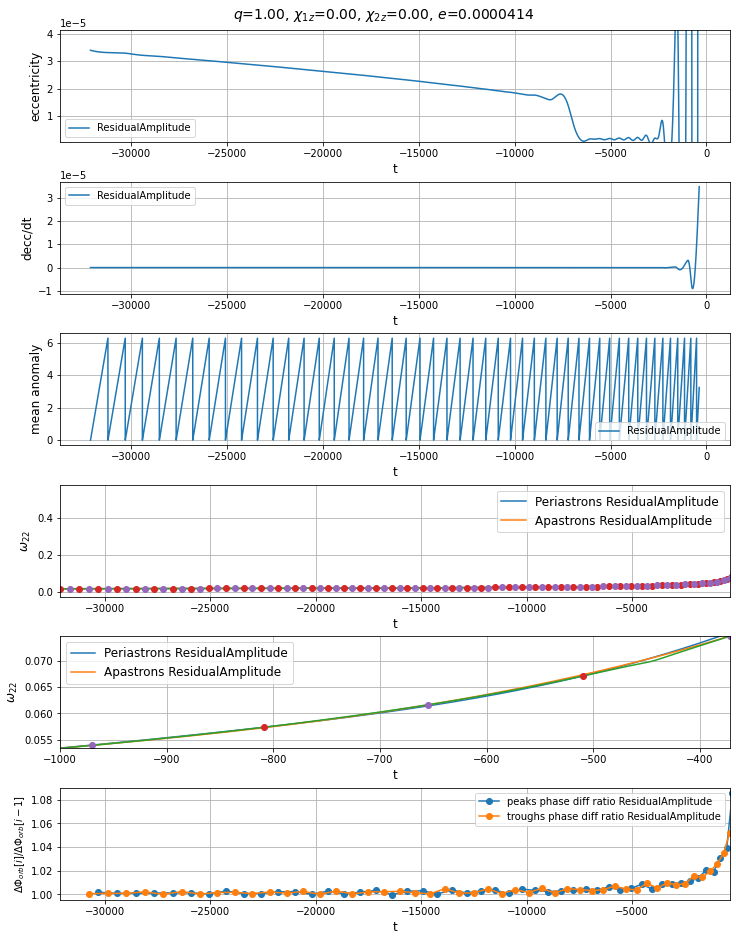

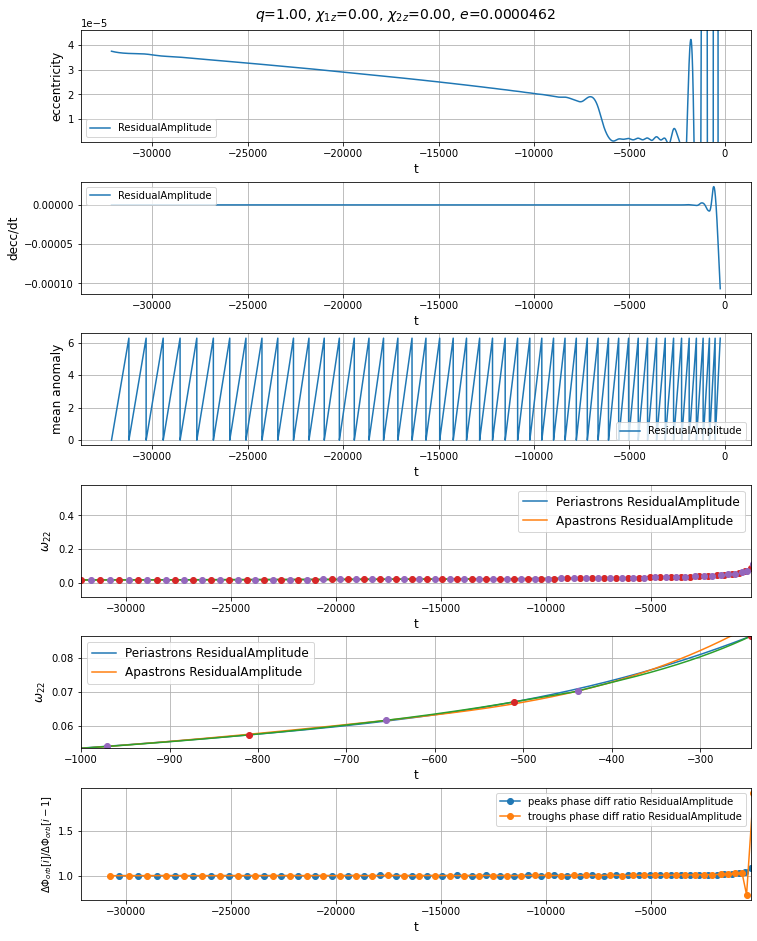

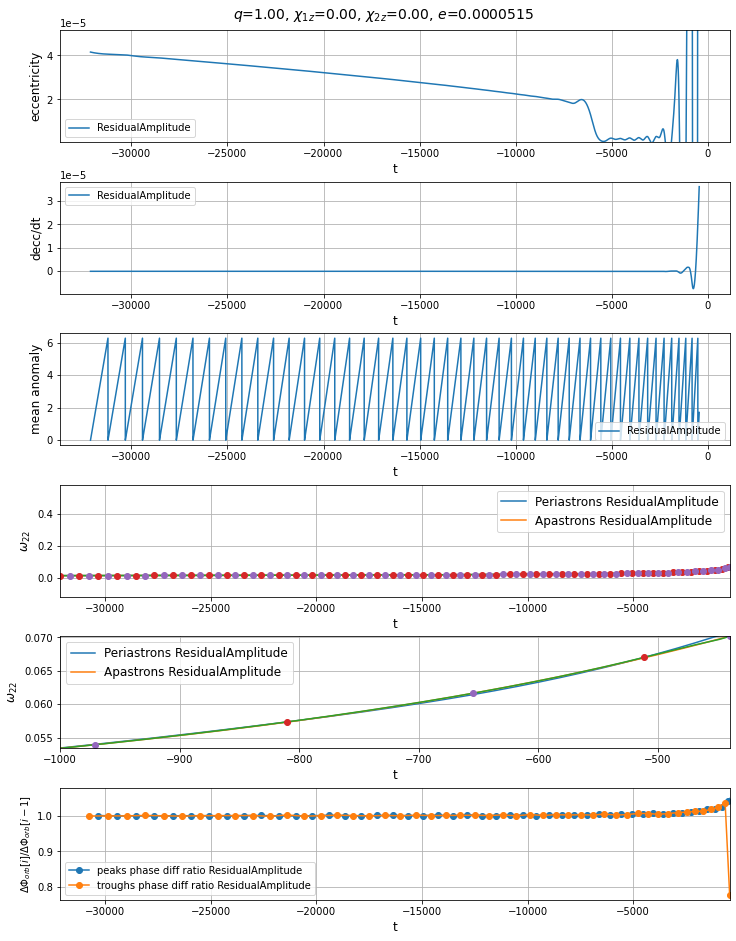

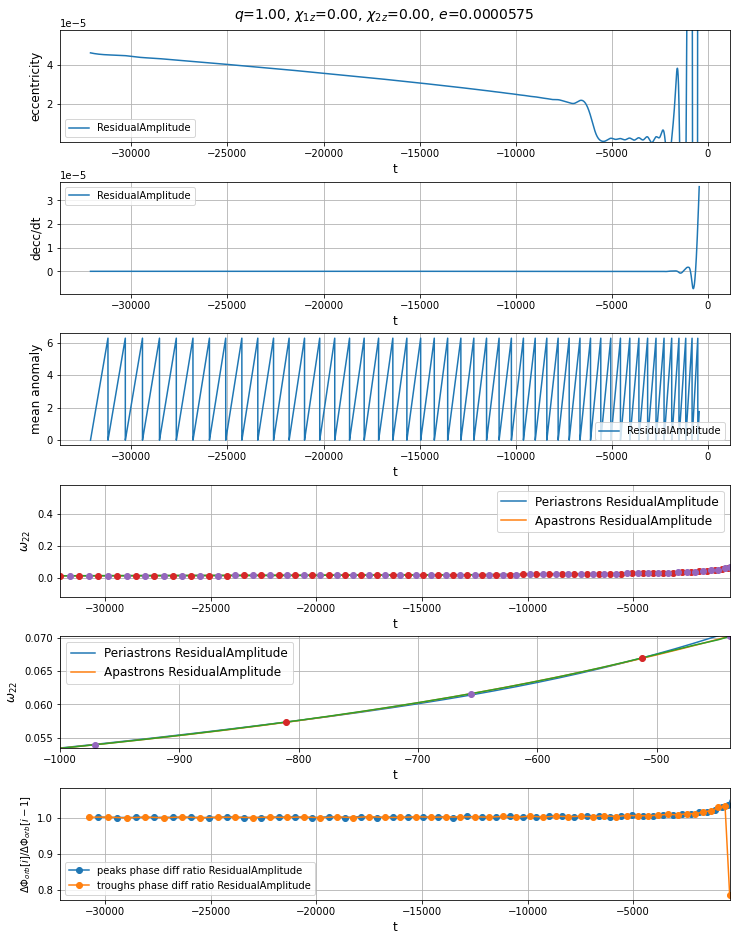

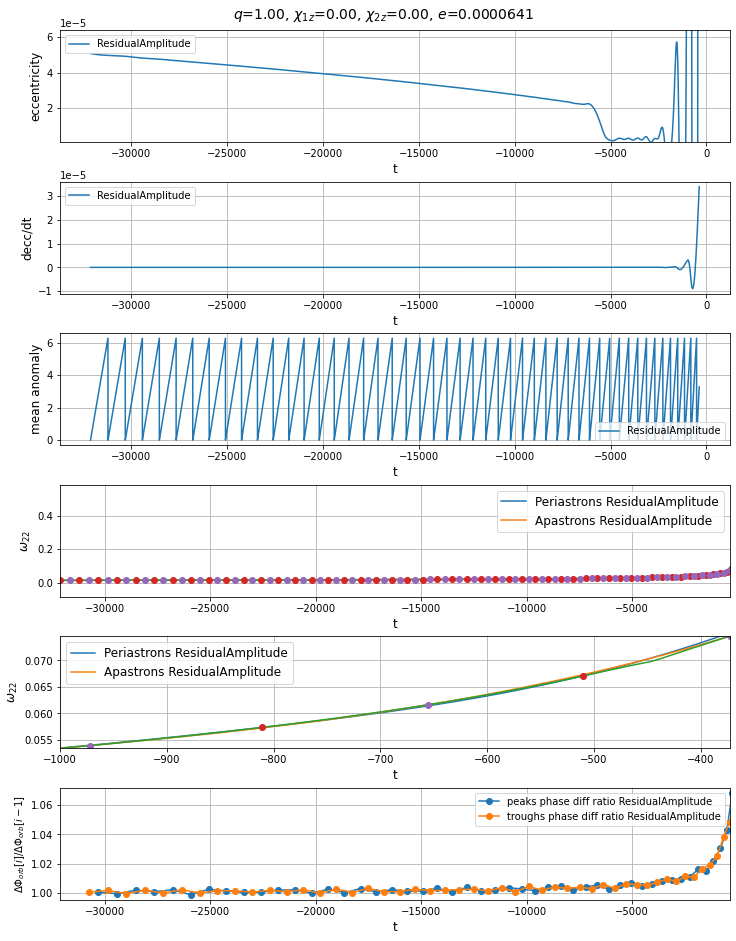

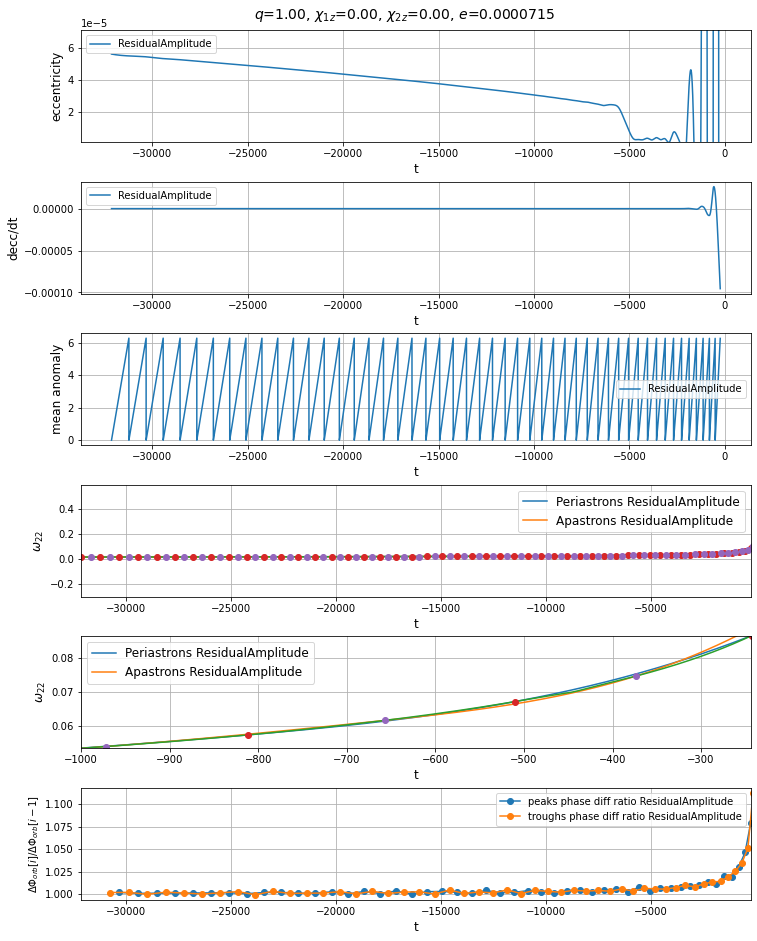

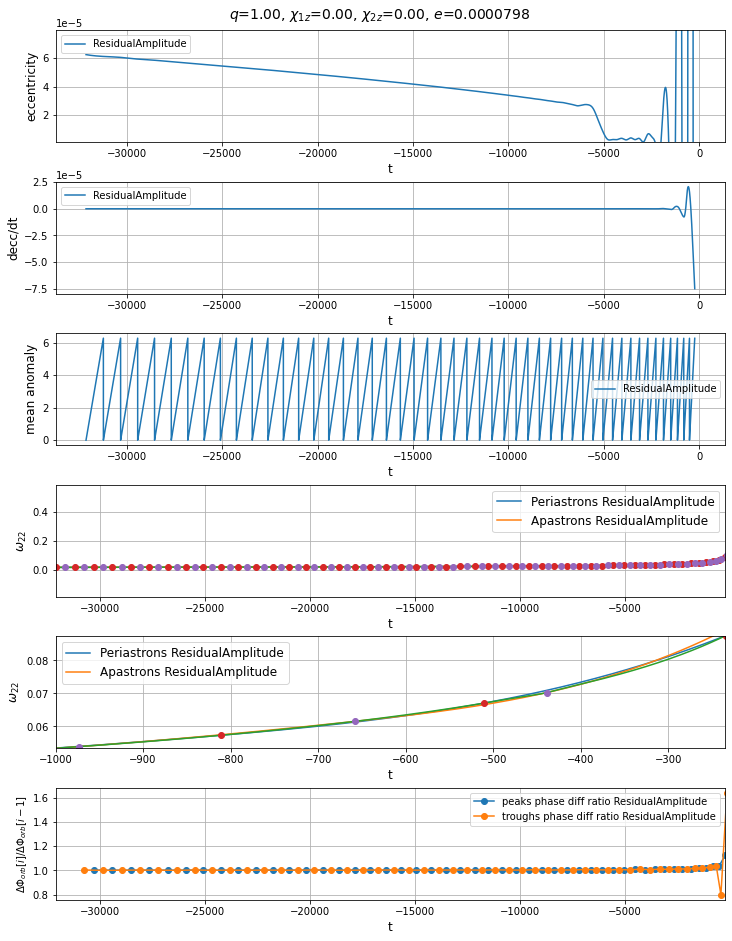

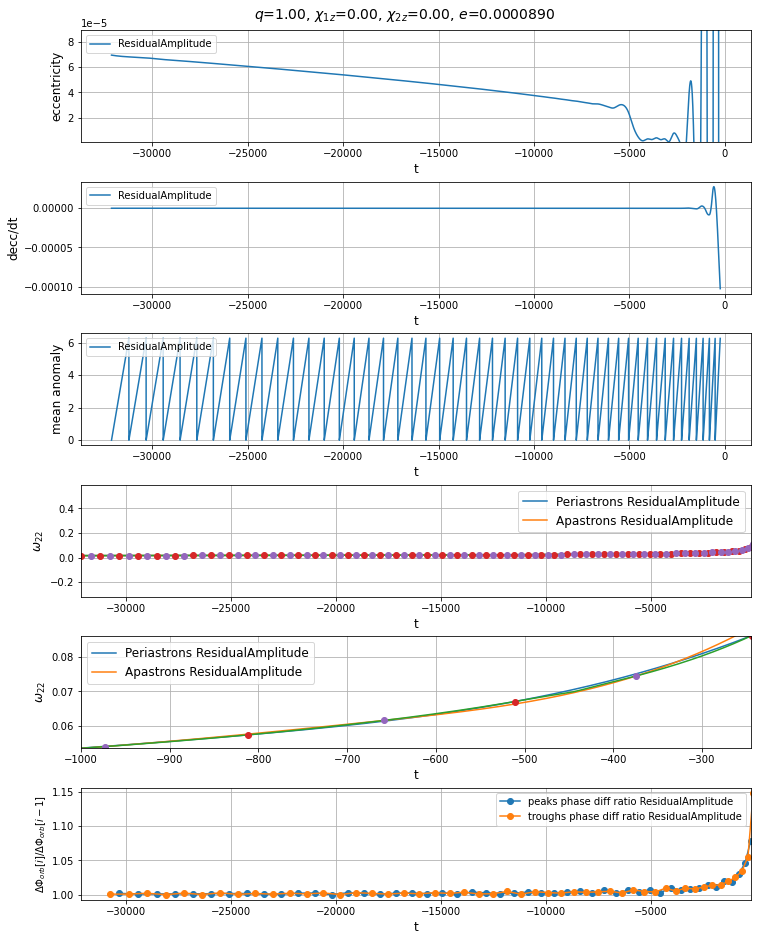

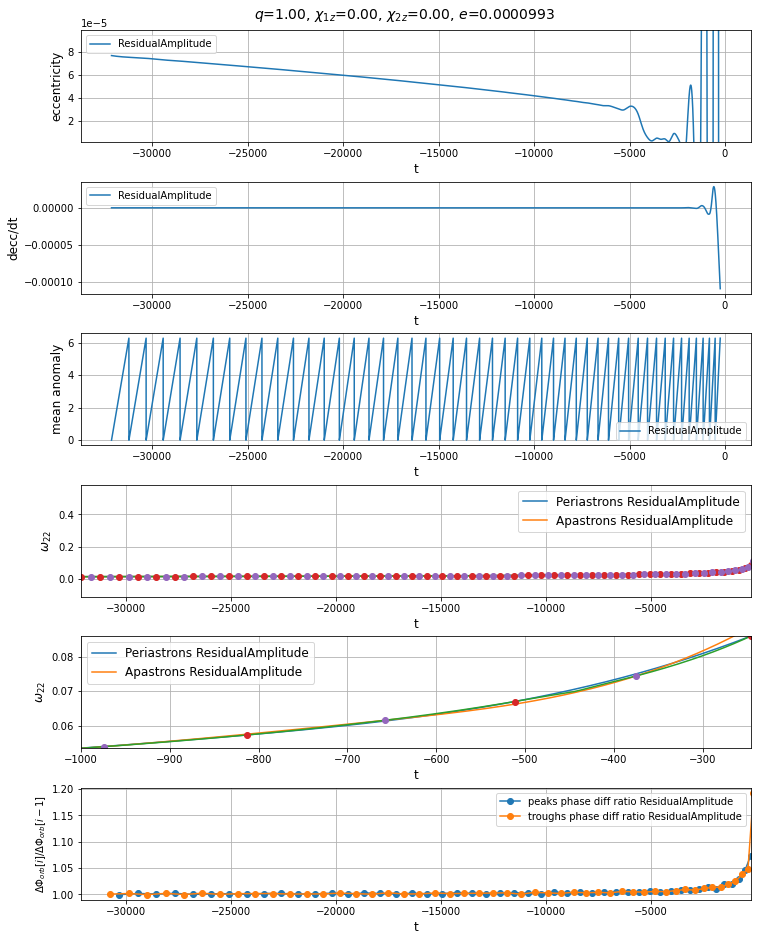

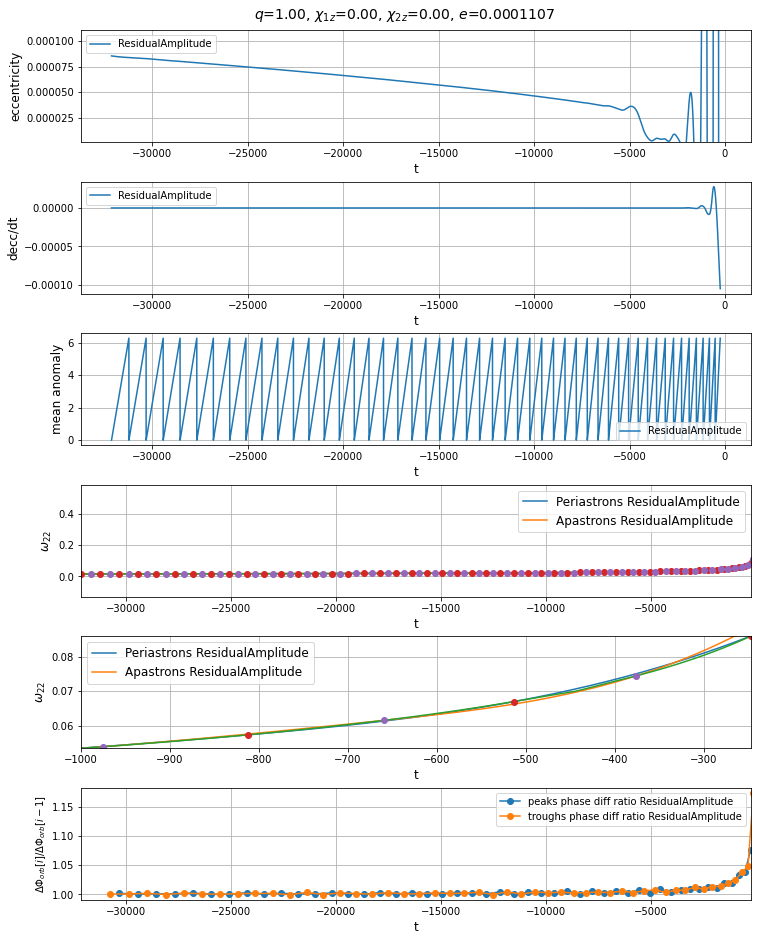

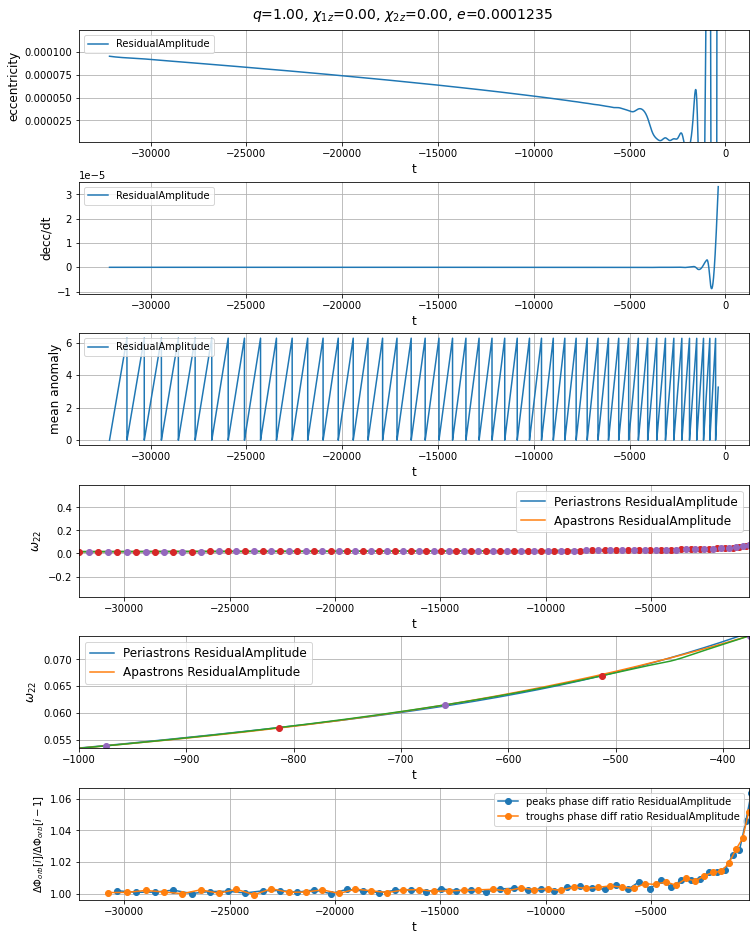

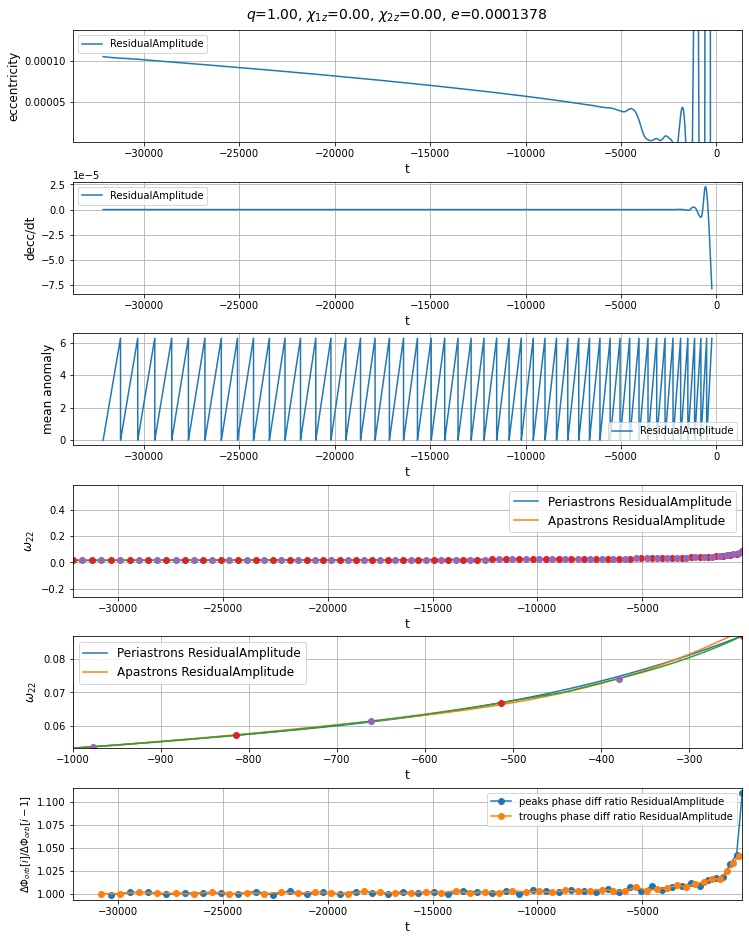

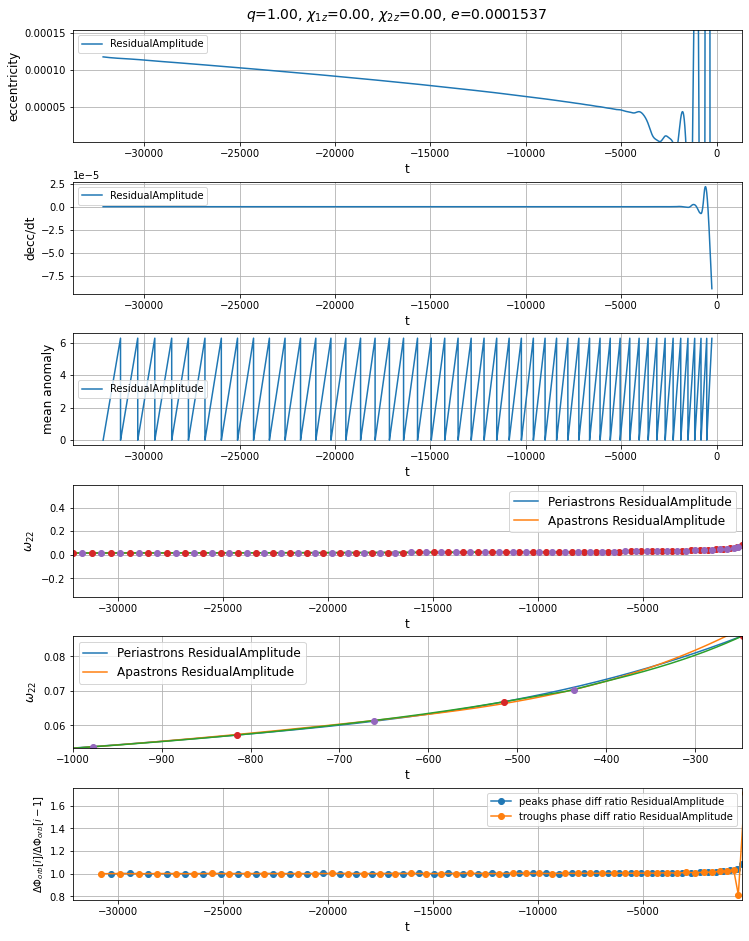

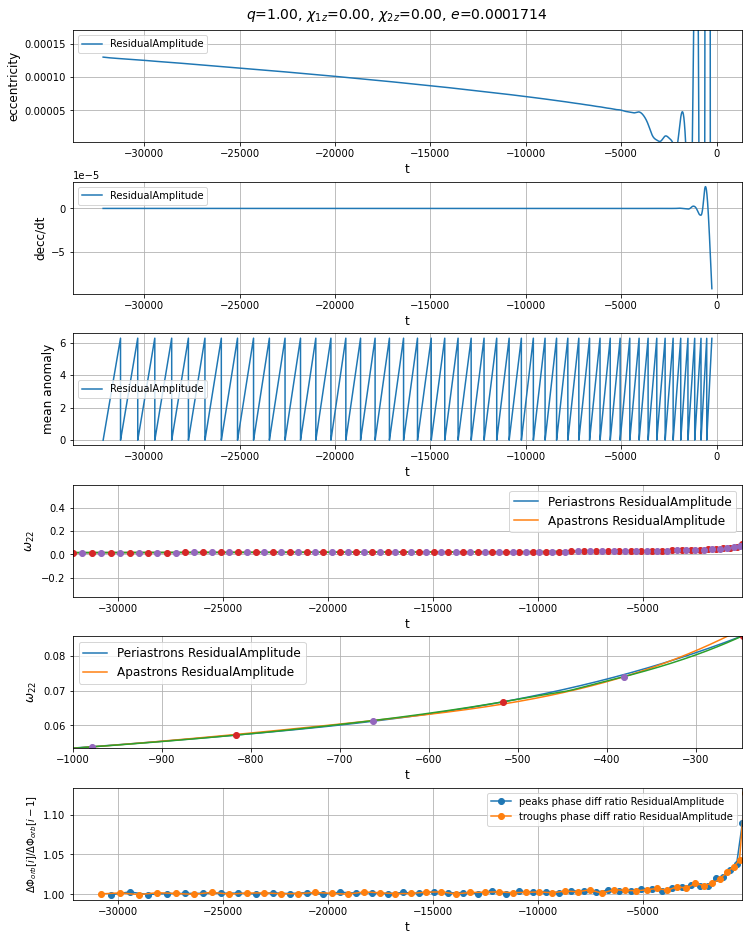

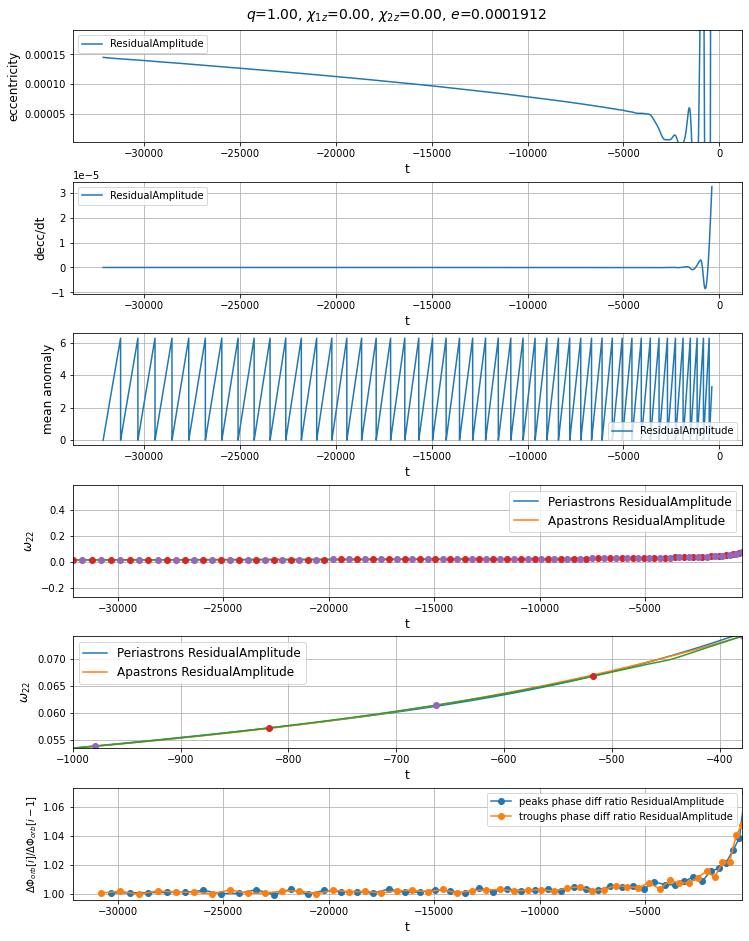

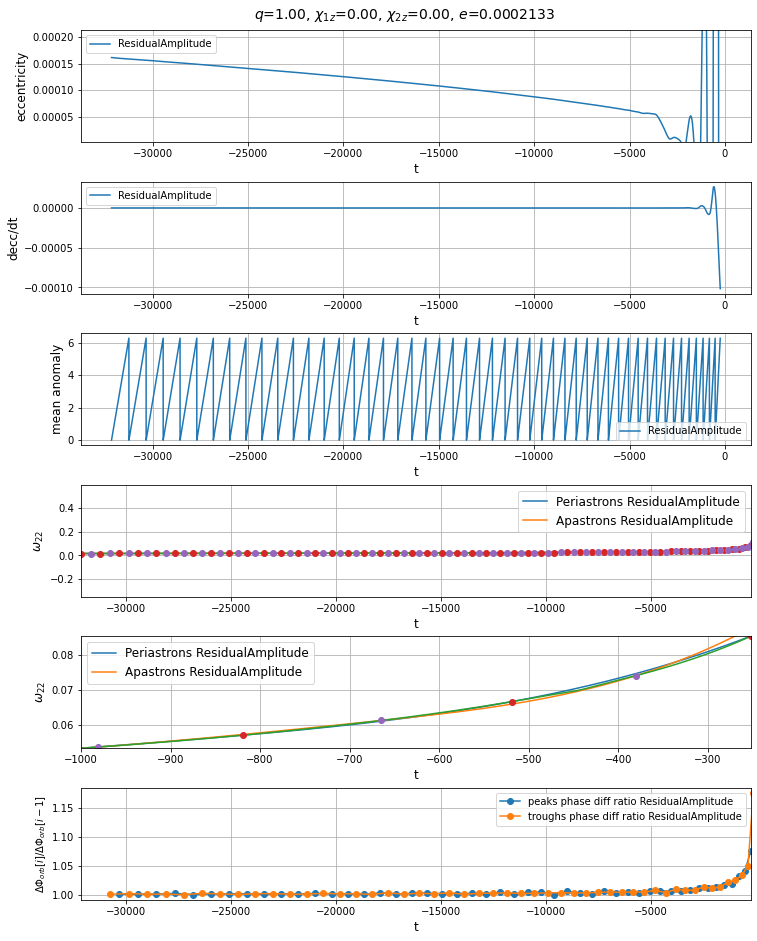

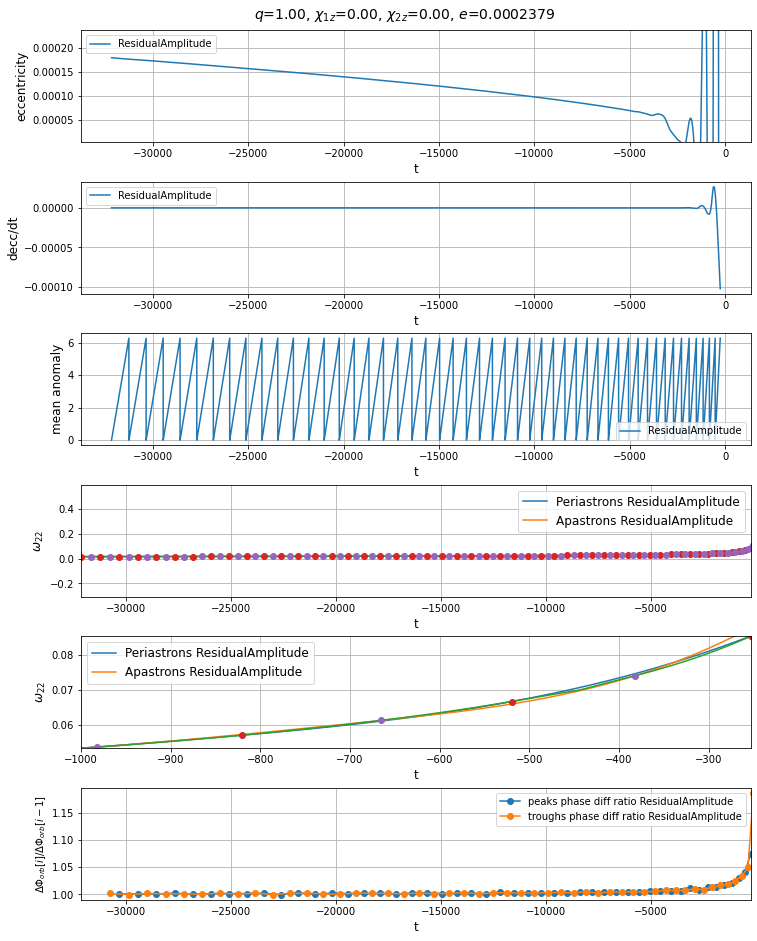

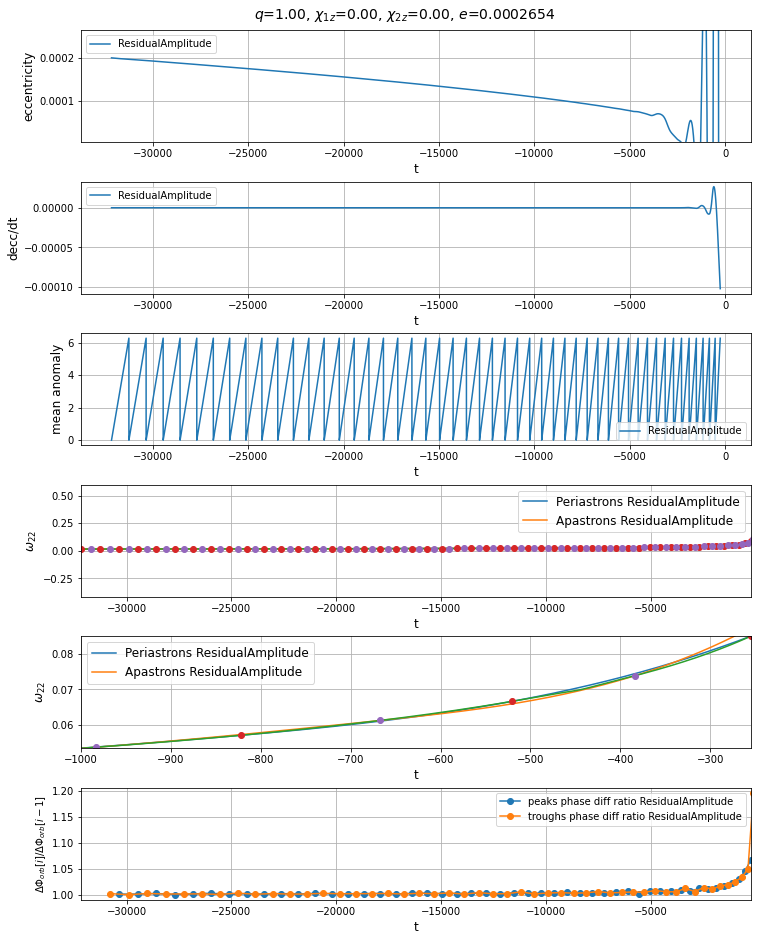

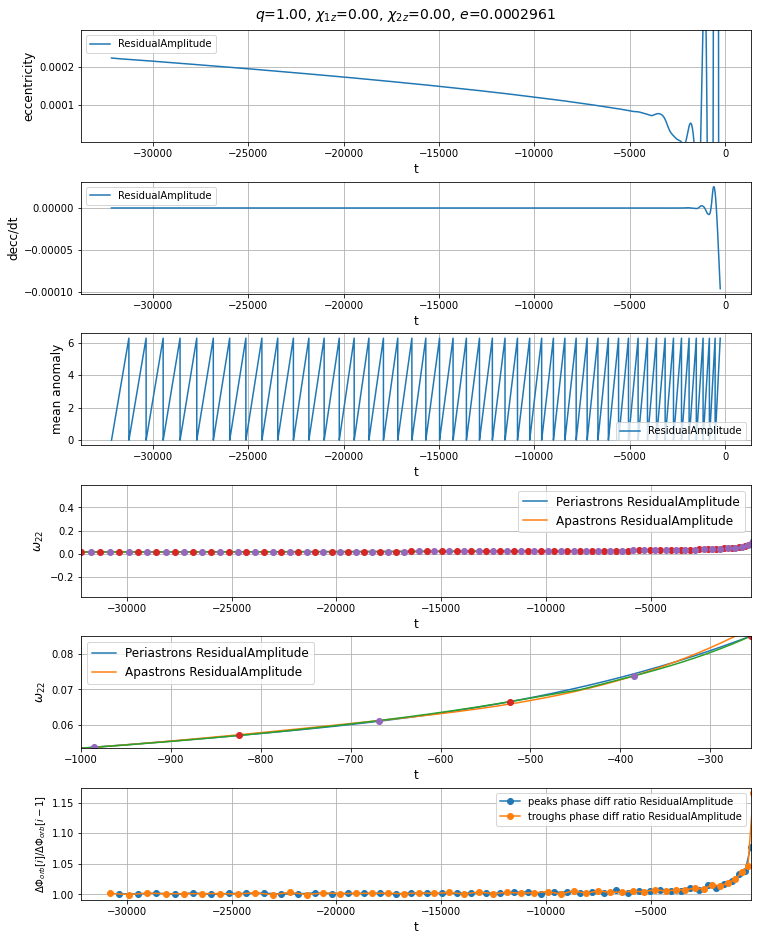

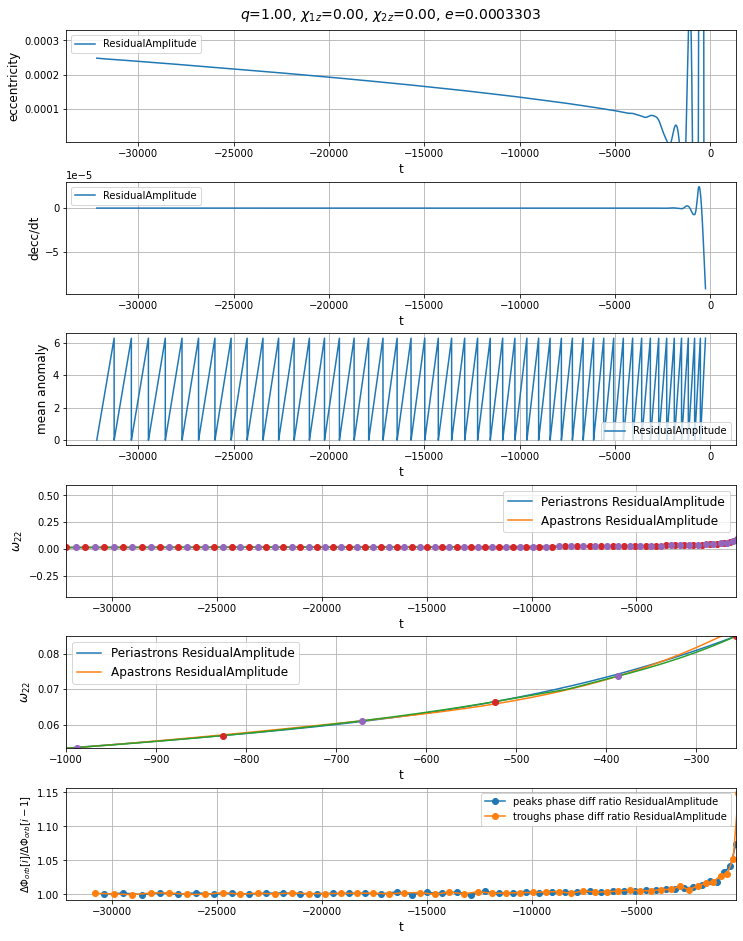

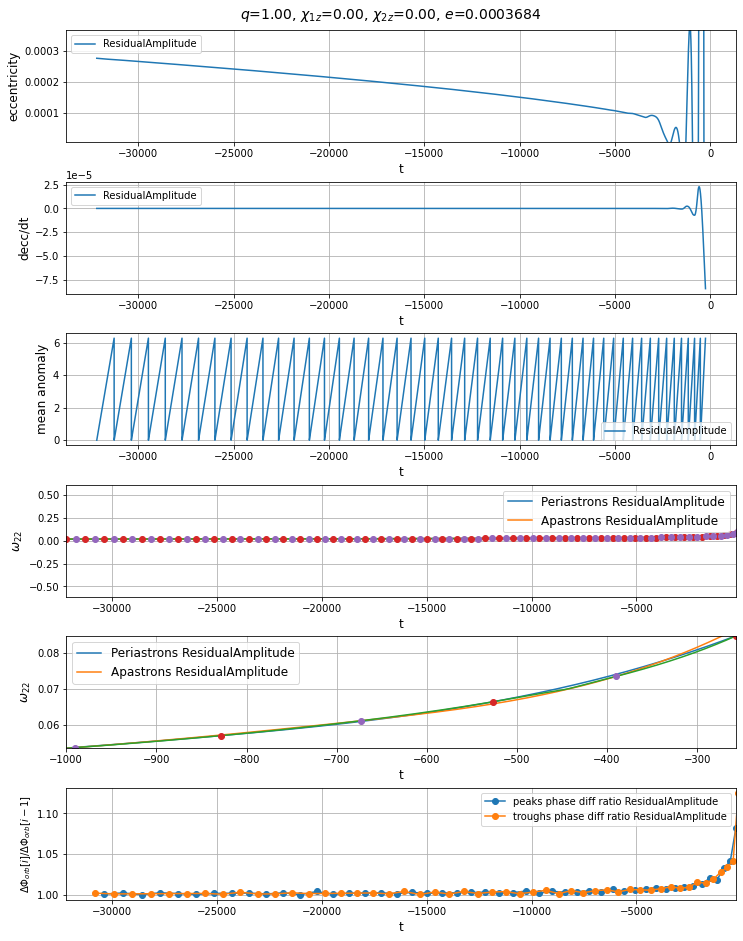

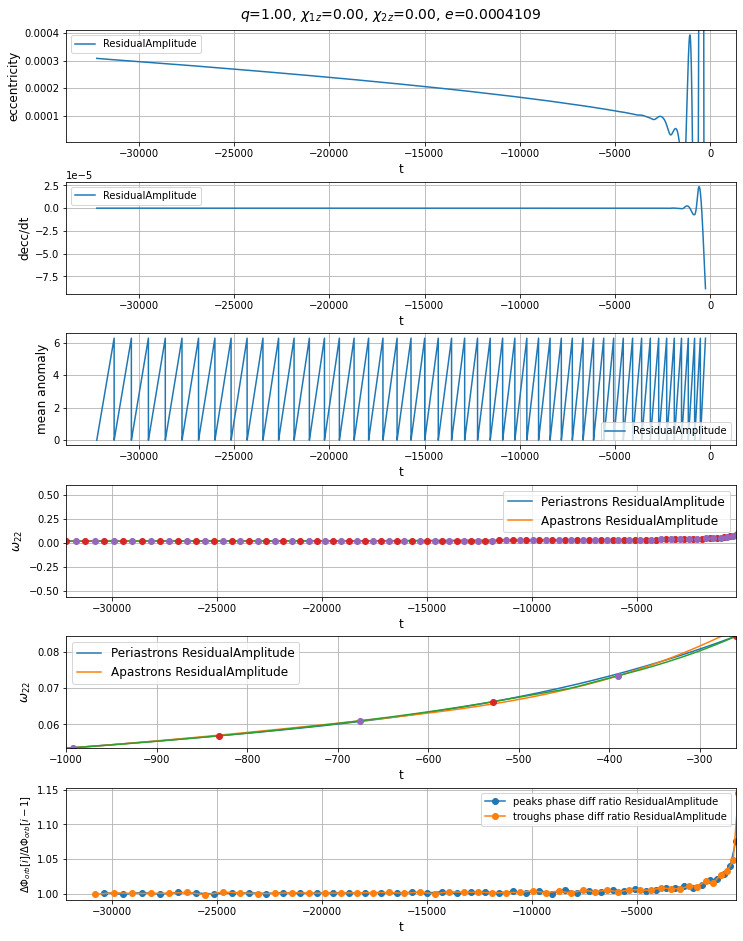

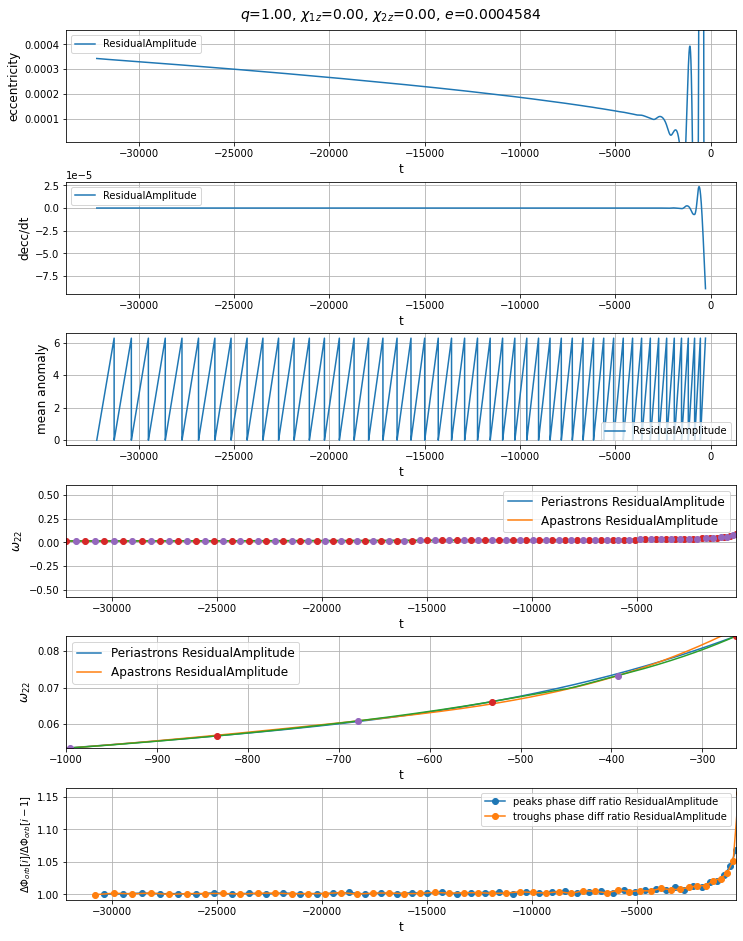

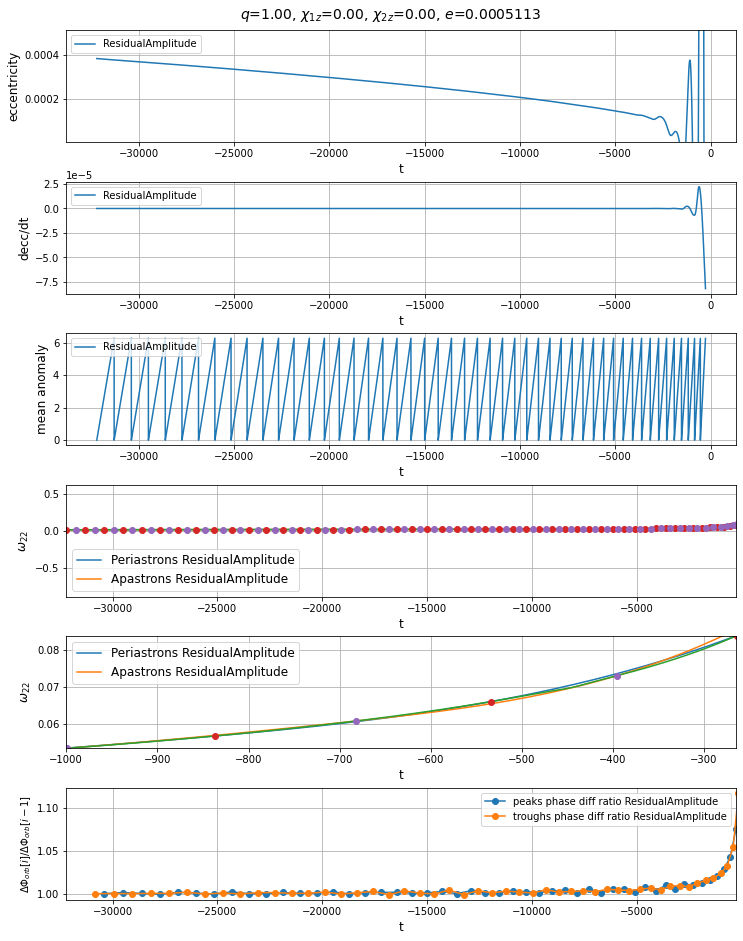

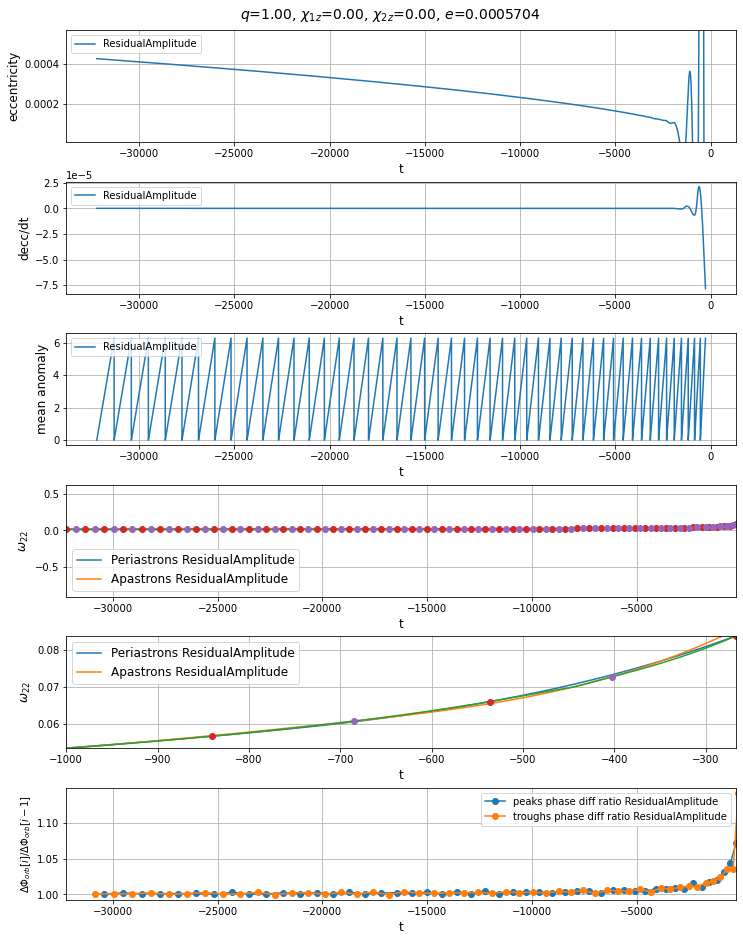

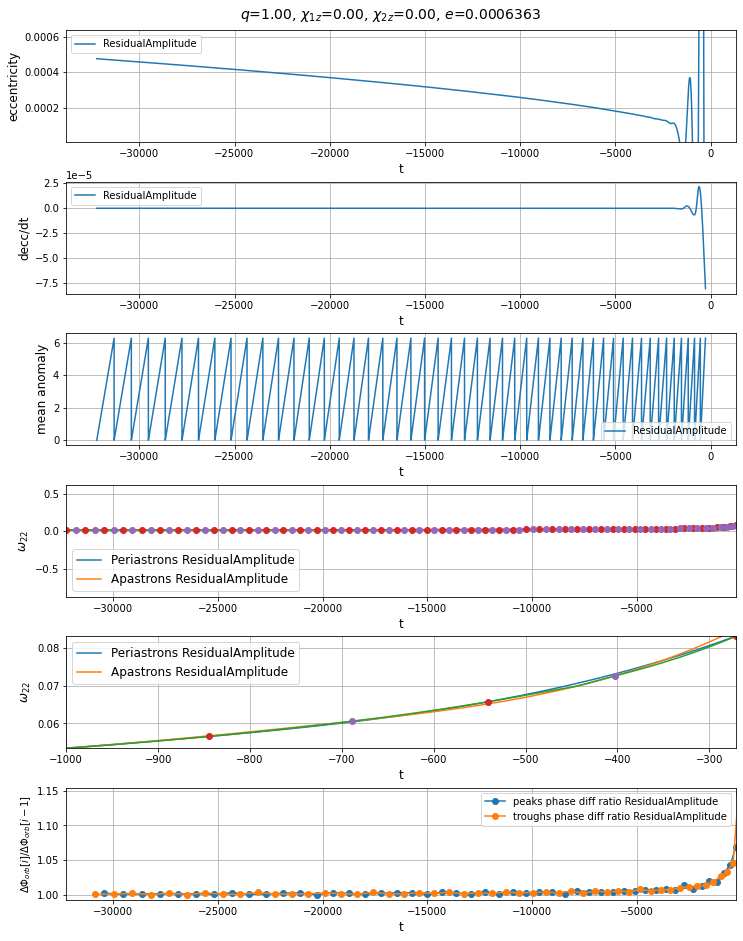

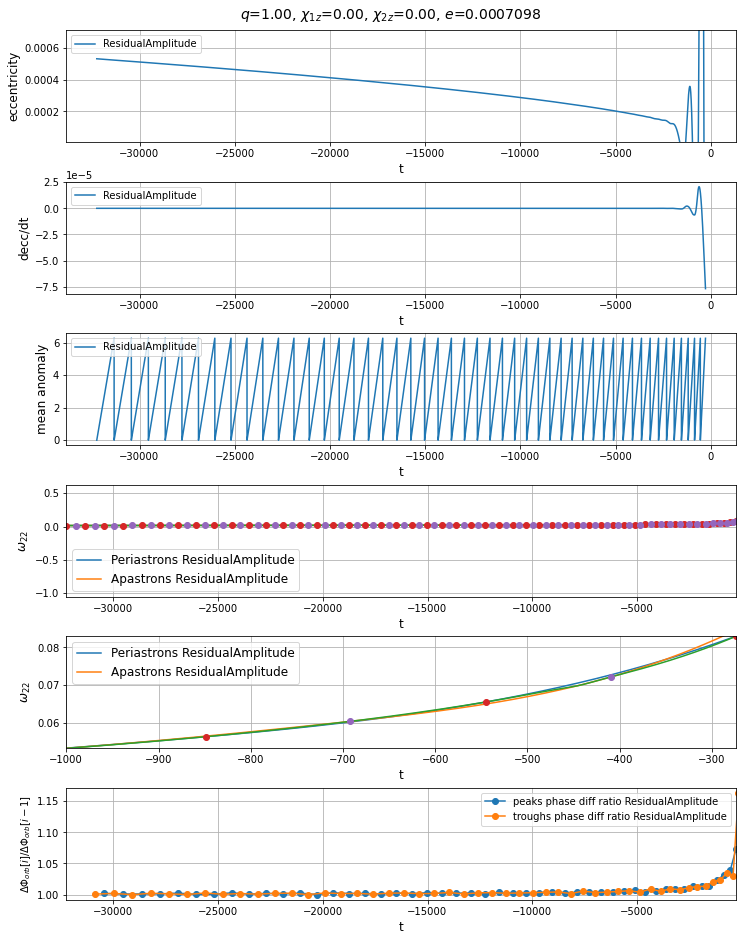

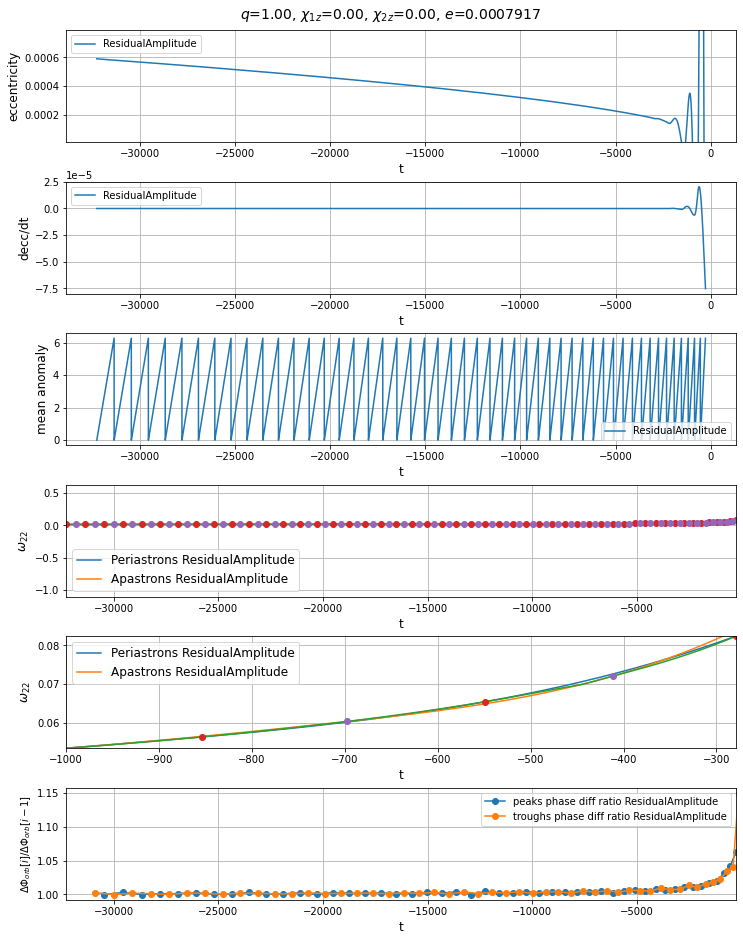

In [ ]:
for fp in EccTestSet1[1:]:
    EOBKwargs = {"filepath": fp,
                "filepath_zero_ecc": EccTestSet1[0],
                "include_zero_ecc": True}
    dataDict = load_waveform("EOB", **EOBKwargs)
    params = params_regex.search(fp)
    q, chi1z, chi2z, ecc = params.groups()
    fig, ax = compare_diagnostic_plots_for_methods(tref_in, dataDict, methods=methods, extra_kwargs=extra_kwargs)
    ax[0].set_ylim(0.01 * float(ecc), float(ecc))
    plt.suptitle(f"$q$={q}, $\chi_{{1z}}$={chi1z}, $\chi_{{2z}}$={chi2z}, $e$={ecc}", y=0.9, fontsize=14)